### The dataset gives us electronics sales data at Amazon. 

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [204]:
data=pd.read_csv('electronics.csv')

In [205]:
data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0


In [206]:
data.shape

(1292954, 10)

In [207]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   item_id     1292954 non-null  int64  
 1   user_id     1292954 non-null  int64  
 2   rating      1292954 non-null  float64
 3   timestamp   1292954 non-null  object 
 4   model_attr  1292954 non-null  object 
 5   category    1292954 non-null  object 
 6   brand       331120 non-null   object 
 7   year        1292954 non-null  int64  
 8   user_attr   174124 non-null   object 
 9   split       1292954 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [208]:
data['timestamp']=pd.to_datetime(data['timestamp'])
data['brand'] = data['brand'].astype(str)
data['category'] = data['category'].astype(str)
data['rating'] = data['rating'].astype(float)
data['user_id'] = data['user_id'].astype(str)
data['item_id'] = data['item_id'].astype(str)
data['year']=pd.DatetimeIndex(data['timestamp']).year
data['month']=pd.DatetimeIndex(data['timestamp']).month
data.head()

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split,month
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,nan,1999,NaN,0,6
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,nan,1999,NaN,0,6
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,nan,1999,NaN,0,6
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,nan,1999,NaN,0,7
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,nan,1999,NaN,0,7


In [209]:
data=data.loc[~data['brand'].str.contains('nan')]
data['brand'].unique()

array(['HP', 'Philips', 'Polaroid', 'Panasonic', 'JVC', 'Fujifilm',
       'Nikon', 'Kodak', 'Sony', 'Canon', 'Kensington', 'Pyle', 'Olympus',
       'Toshiba', 'Logitech', 'Etre Jeune', 'Linksys', 'Vivitar',
       'Sennheiser', 'Apple', 'Samsung', 'EldHus', 'Bose', 'Archos',
       'Garmin', 'Jabra', 'Gary Fong', 'ViewSonic', 'Savage', 'Uniden',
       'ebasy', 'Generic', 'JLAB', 'Skullcandy', 'TaoTronics', 'Neewer',
       'Koolertron', 'DURAGADGET', 'iRULU', 'Tiamat', 'DBPOWER', 'Fintie',
       'Plemo', 'EINCAR', 'Cooper Cases', 'LSS', 'Mpow', 'XShields',
       'IRULU', 'Funlux'], dtype=object)

In [210]:
data.describe()

,rating,year,split,month
count,331120.000000,331120.000000,331120.000000,331120.000000
mean,4.052428,2014.460655,0.168111,6.329554
std,1.367006,2.699537,0.540578,3.596386
min,1.000000,1999.000000,0.000000,1.000000
25%,4.000000,2014.000000,0.000000,3.000000
50%,5.000000,2015.000000,0.000000,6.000000
75%,5.000000,2016.000000,0.000000,9.000000
max,5.000000,2018.000000,2.000000,12.000000


In [211]:
data.nunique()

item_id         2207
user_id       316699
rating             5
timestamp       6108
model_attr         3
category          10
brand             50
year              20
user_attr          2
split              3
month             12
dtype: int64

In [212]:
data.isnull().sum()

item_id            0
user_id            0
rating             0
timestamp          0
model_attr         0
category           0
brand              0
year               0
user_attr     285954
split              0
month              0
dtype: int64

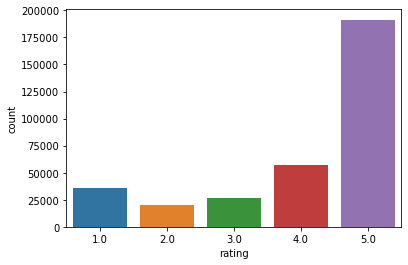

In [213]:
# the distribution of ratings 
sns.countplot(x='rating',data=data);

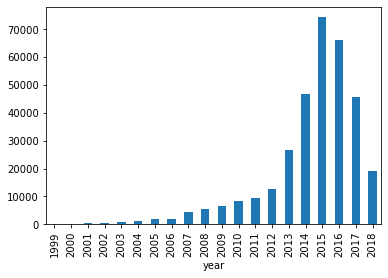

In [214]:
# what was the best year of sales
data.groupby('year')['year'].count().plot(kind='bar');

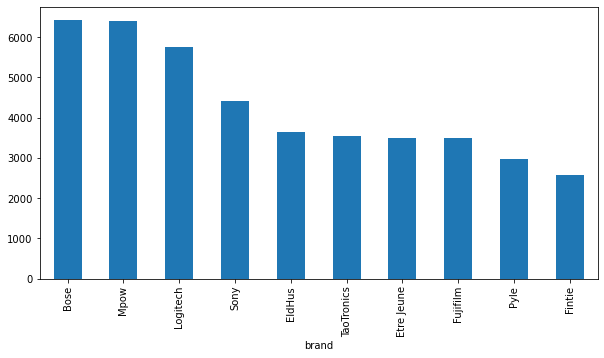

In [219]:
# what brand sold the most in 2015
year_2015=data.loc[data['year']==2015]

plt.figure(figsize=(10,5))
year_2015.groupby('brand')['year'].count().sort_values(ascending=False).head(10).plot(kind='bar');

In [ ]:
#Mpow sold the most followed closely with Bose while the least sold was Eldhus.

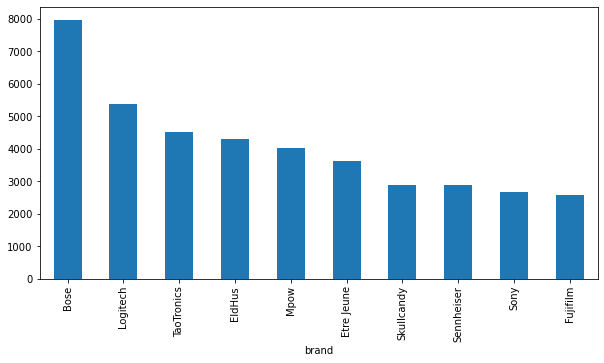

In [220]:
# what product sold the most in 2016
year_2016=data.loc[data['year']==2016]

plt.figure(figsize=(10,5))
year_2016.groupby('brand')['year'].count().sort_values(ascending=False).head(10).plot(kind='bar');

In [ ]:
# the top 3 products sold in 2016 were Bose, Logitech & TaoTronics

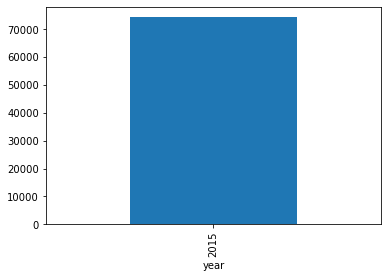

In [228]:
# How much was made in sales in the year 2015
year_2015_sales=data.loc[data['year']==2015]
year_2015_sales.groupby('year')['year'].count().plot(kind='bar');

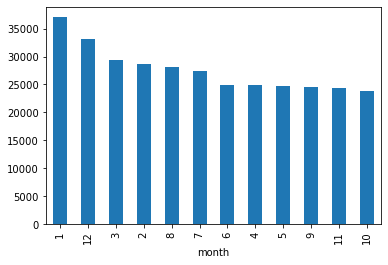

In [231]:
# what was the best month of sales
#month_sales
data.groupby('month')['month'].count().sort_values(ascending=False).plot(kind='bar');

#### The month of January had the best sales.

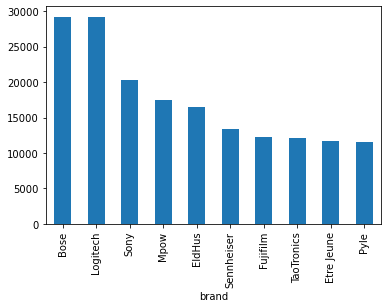

In [236]:
# What product by brand name sold the most?
data.groupby('brand')['brand'].count().sort_values(ascending=False).head(10).plot(kind='bar');


#### computers and accesories were sold the second most

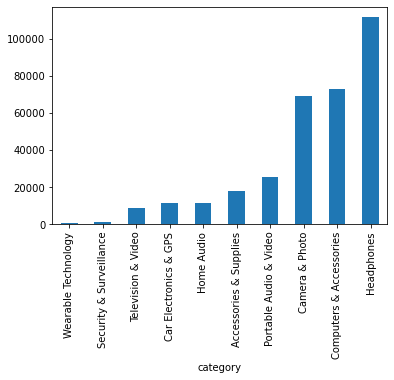

In [240]:
# What product by category sold the least?
data.groupby('category')['category'].count().sort_values(ascending=True).plot(kind='bar');

#### We can see that the category of Wearable technology sold the least.

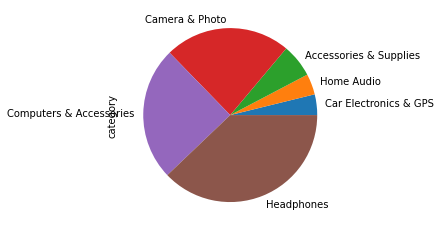

In [243]:
# category percentage sales
data.groupby('category')['category'].count().head(6).sort_values(ascending=True).plot(kind='pie');

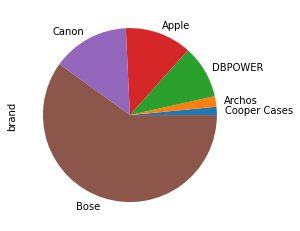

In [244]:
# brand percentage sales
data.groupby('brand')['brand'].count().head(6).sort_values(ascending=True).plot(kind='pie');

##### conclusion of our analysis

##### We can see that the year 2015 had the best sales.

##### The month of January had the best sales.

##### We can see that the brands Bose and Canon sold the most

##### We can see that the category of Headphones sold the most.